In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import nibabel as nb
from matplotlib import pyplot as plt
%matplotlib inline

In [144]:
df =  pd.read_csv('figures/h3.1_significant_features.csv', index_col=0)
agedf = pd.read_csv('figures/h3.2_singificant_feature_age.csv', index_col=0)

In [145]:
df = pd.concat((df,df.feature.str.extract('(?P<metric>[a-zA-Z_]*)(?P<number>[0-9]*)')), axis=1)

/data/nielsond/python/envs/py3_c/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [146]:
df = df.merge(agedf, how='outer', on='feature', suffixes=('', '_age'))

In [147]:
df.groupby('metric').count()

,feature,f_statistic,pvals,pvals_fdr,number,f_statistic_age,pvals_age,pvals_fdr_age
metric,,,,,,,,
CSF_Frac,1,1,1,1,1,1,1,1
GM_Frac,1,1,1,1,1,1,1,1
Intra_Cran_Vol,1,1,1,1,1,1,1,1
WM_Frac,1,1,1,1,1,1,1,1
area,5124,5124,5124,5124,5124,5124,5124,5124
aseg,66,62,62,62,66,62,62,62
thickness,5124,5124,5124,5124,5124,5124,5124,5124


In [148]:
df.loc[df.number=="",'metric']='Simple Features (n=4)'
df.loc[df.metric=="area", 'metric'] = "Cortical Surface Area (n=5124)"
df.loc[df.metric=="thickness", 'metric'] = "Cortical Thickness (n=5124)"
df.loc[df.metric=="aseg", 'metric'] = "Subcortical Volume (n=66)"


In [149]:
df['sig'] = df['pvals_fdr'] < 0.1
df['sig_age'] = df['pvals_fdr_age'] < 0.05

In [150]:
summary_df = df.groupby('metric').agg({'feature': 'count', 'sig':'sum','sig_age':'sum'}).reset_index()

In [151]:
summary_df = summary_df.rename(columns={'metric': 'Metric', 'feature':'Total', 'sig':'Dataset Only', 'sig_age':'Dataset + Dataset*Age'}).sort_values('Total', ascending=False)

In [152]:
summary_df

,Metric,Total,Dataset Only,Dataset + Dataset*Age
0,Cortical Surface Area (n=5124),5124,4409.0,20.0
1,Cortical Thickness (n=5124),5124,4685.0,514.0
3,Subcortical Volume (n=66),66,61.0,27.0
2,Simple Features (n=4),4,4.0,3.0


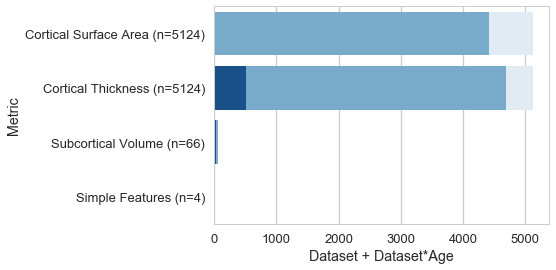

In [153]:
sns.set(context="talk", style="whitegrid")
#sns.set_color_codes("pastel")
sns.barplot(y='Metric', x='Total', data=summary_df, color="#deebf7")
#sns.set_color_codes("muted")
sns.barplot(y='Metric', x='Dataset Only', data=summary_df, color="#6baed6")
sns.barplot(y='Metric', x='Dataset + Dataset*Age', data=summary_df, color="#08519c")


In [154]:
sum_pct_df = summary_df.copy()
sum_pct_df['Dataset Only'] = summary_df['Dataset Only']/summary_df['Total']
sum_pct_df['Dataset + Dataset*Age'] = summary_df['Dataset + Dataset*Age']/summary_df['Total']
sum_pct_df['Total'] = summary_df['Total']/summary_df['Total']

In [155]:
summary_df

,Metric,Total,Dataset Only,Dataset + Dataset*Age
0,Cortical Surface Area (n=5124),5124,4409.0,20.0
1,Cortical Thickness (n=5124),5124,4685.0,514.0
3,Subcortical Volume (n=66),66,61.0,27.0
2,Simple Features (n=4),4,4.0,3.0


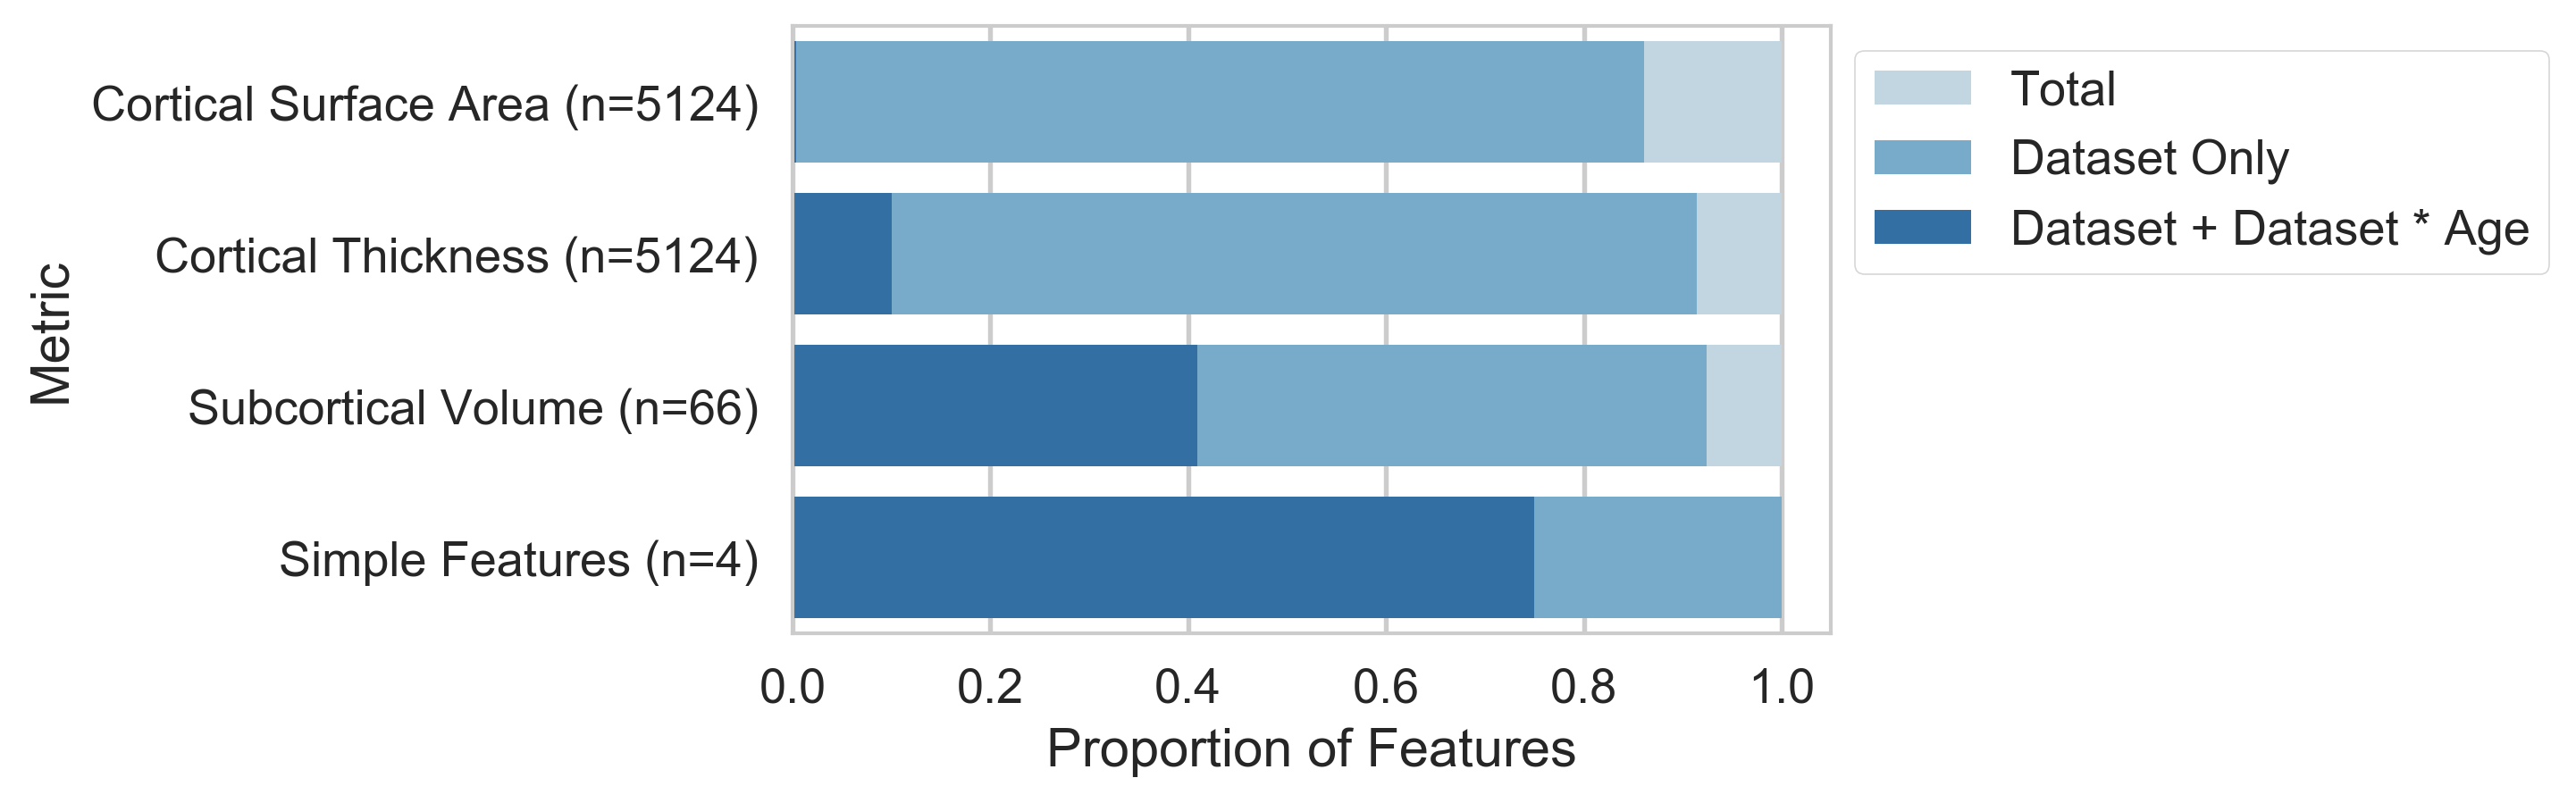

In [159]:
fig, ax = plt.subplots(1, figsize=(5,3), dpi=300)

sns.set(context="talk", style="whitegrid")
#sns.set_color_codes("pastel")
sns.barplot(y='Metric', x='Total', data=sum_pct_df, color="#bdd7e7", label='Total')
#sns.set_color_codes("muted")
sns.barplot(y='Metric', x='Dataset Only', data=sum_pct_df, color="#6baed6", label='Dataset Only')
sns.barplot(y='Metric', x='Dataset + Dataset*Age', data=sum_pct_df, color="#2171b5", label='Dataset + Dataset * Age')
ax.set_xlabel("Proportion of Features")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=True)
fig.savefig('slide22.fig.png',bbox_inches='tight')

In [177]:
df.query('metric=="Cortical Thickness (n=5124)" & sig_age').f_statistic_age.min()

6.4796997593166816

In [176]:
df.query('metric=="Cortical Surface Area (n=5124)" & sig_age').f_statistic_age.min()

6.5146681326813045

In [171]:
nb.freesurfer.io.write_morph_data('lh_h31_thickness_dataset', df.query('metric=="Cortical Thickness (n=5124)"').f_statistic.values[:(5124//2)], fnum=5124/2)
nb.freesurfer.io.write_morph_data('rh_h31_thickness_dataset', df.query('metric=="Cortical Thickness (n=5124)"').f_statistic.values[(5124//2):], fnum=5124/2)
nb.freesurfer.io.write_morph_data('lh_h31_area_dataset', df.query('metric=="Cortical Surface Area (n=5124)"').f_statistic.values[:(5124//2)], fnum=5124/2)
nb.freesurfer.io.write_morph_data('rh_h31_area_dataset', df.query('metric=="Cortical Surface Area (n=5124)"').f_statistic.values[(5124//2):], fnum=5124/2)
nb.freesurfer.io.write_morph_data('lh_h31_thickness_dataset_age', df.query('metric=="Cortical Thickness (n=5124)"').f_statistic_age.values[:(5124//2)], fnum=5124/2)
nb.freesurfer.io.write_morph_data('rh_h31_thickness_dataset_age', df.query('metric=="Cortical Thickness (n=5124)"').f_statistic_age.values[(5124//2):], fnum=5124/2)
nb.freesurfer.io.write_morph_data('lh_h31_area_dataset_age', df.query('metric=="Cortical Surface Area (n=5124)"').f_statistic_age.values[:(5124//2)], fnum=5124/2)
nb.freesurfer.io.write_morph_data('rh_h31_area_dataset_age', df.query('metric=="Cortical Surface Area (n=5124)"').f_statistic_age.values[(5124//2):], fnum=5124/2)

#nb.freesurfer.io.write_morph_data('h31_thickness_dataset_age', df.query('metric=="Cortical Thickness (n=5124)"').f_statistic_age.values, fnum=5124)
#nb.freesurfer.io.write_morph_data('h31_surface_dataset_age', df.query('metric=="Cortical SurfaceArea (n=5124)"').f_statistic_age.values, fnum=5124)